In [1]:
import pandas as pd
import ECMOrl as rl
import plot_ECMO
import WIS as wis

In [2]:
cluster_num = 50
num_models = 500

In [6]:
Data_folder = "Discrete Data"
merge_data = pd.read_csv(f"../../{Data_folder}/merge_data_train.csv")
data_clustered = pd.read_csv(f"../../{Data_folder}/ECMO_data_clustered_train.csv")
unique_action_space = pd.read_csv(f'../../{Data_folder}/unique_action_space.csv')

model_num=86
merged_test = pd.read_csv(f"../../{Data_folder}/merge_data_test.csv")
clustered_test = pd.read_csv(f"../../{Data_folder}/ECMO_data_clustered_test.csv")
ori_AS = pd.read_csv(f"../../{Data_folder}/non_discritised_data.csv")

### Train Models

In [ ]:
rl.parallel_q_learning(data_clustered, merge_data, cluster_num, unique_action_space, num_models)

  0%|          | 0/500 [00:00<?, ?it/s]

### Evaluated Trained Models on testing dataset

In [6]:
best_model_num, lower_upper_bonds_avg, medians_avg, maxs_avg = wis.wis_all_models(clustered_test, merged_test, num_models)

100%|██████████| 500/500 [16:43<00:00,  2.01s/it]

The model with maximum reward is Model 196


NameError: name 'calculate_clinician_reward' is not defined

-0.05000404825661729


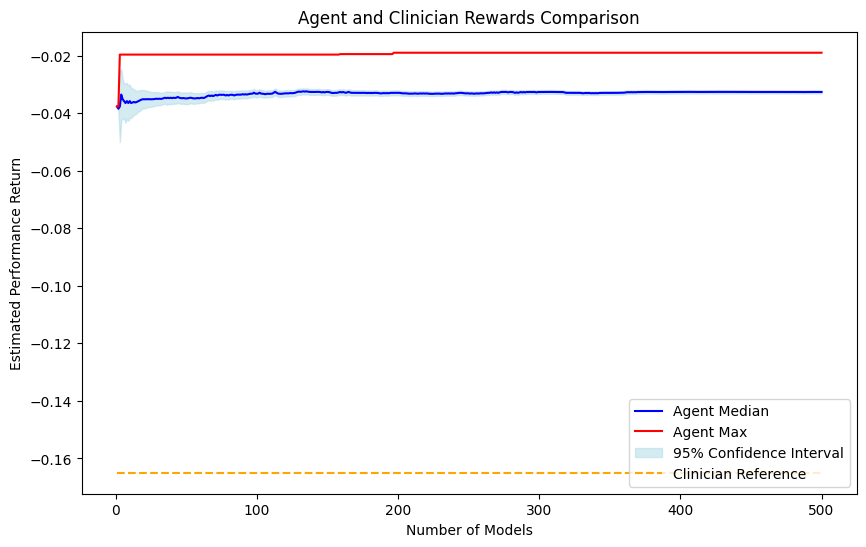

In [27]:
import importlib
importlib.reload(plot_ECMO)
clinician_reward = wis.calculate_clinician_reward(merged_test)
plot_ECMO.plot_performance_comparison(lower_upper_bonds_avg, medians_avg, maxs_avg, clinician_reward, type = "n")

### Plot and Evaluation

In [4]:
# Plot Validation_average_occurrences
plot_ECMO.plot_average_occurrences(unique_action_space, cluster_num)

In [8]:
model = rl.optimal_model(best_model_num, merged_test, clustered_test,cluster_num)
plot_ECMO.plot_comparison(model,cluster_num, unique_action_space)
plot_ECMO.plot_traj(model,cluster_num, ori_AS, unique_action_space)